In [12]:
import pandas as pd
import numpy as np
import os
import math
import matplotlib.pyplot as plt
import seaborn as sns
from ipynb.fs.defs.GraphReader import GraphReader

In [3]:
seq_log_dir = '/home/a20114261/sdelrio/alarm_datasets/log_sequential_results/'

In [4]:
processed_files = set([x.split('_')[2] for x in os.listdir(seq_log_dir)])

In [5]:
processed_files

{'Alarm10s1000v1',
 'Alarm10s1000v10',
 'Alarm10s1000v2',
 'Alarm10s1000v3',
 'Alarm10s1000v4',
 'Alarm10s1000v5',
 'Alarm10s1000v6',
 'Alarm10s1000v7',
 'Alarm10s1000v8',
 'Alarm10s1000v9',
 'Alarm10s5000v1',
 'Alarm10s5000v10',
 'Alarm10s5000v2',
 'Alarm10s5000v3',
 'Alarm10s5000v4',
 'Alarm10s5000v5',
 'Alarm10s5000v6',
 'Alarm10s5000v7',
 'Alarm10s5000v8',
 'Alarm10s5000v9',
 'Alarm10s500v1',
 'Alarm10s500v10',
 'Alarm10s500v2',
 'Alarm10s500v3',
 'Alarm10s500v4',
 'Alarm10s500v5',
 'Alarm10s500v6',
 'Alarm10s500v7',
 'Alarm10s500v8',
 'Alarm10s500v9'}

In [6]:
results = []
for p_file in processed_files:
    result_dict = {}
    print("Start of dataset "+p_file)
    result_dict['dataset'] = p_file
    selected_files = [x for x in os.listdir(seq_log_dir) if x.split('_')[2] == p_file]
    result_dict['results']=[]
    #print(selected_files)
    for sel_file in selected_files:
        ff = open(seq_log_dir+sel_file,'r')
        lines = ff.read().split('\n')
        for line in lines:
            sections = line.split(';')
            if (len(sections)==1):
                continue
            pob_dict = {}
            pob_dict['model'] = sections[0]
            pob_dict['time'] = float(sections[1])
            pob_dict['node'] = sel_file.split('_')[3].split('.')[0]
            pob_dict['distance'] = float(sections[2].split(',')[1].split(':')[1].replace(' ','').replace('}',''))
#             print(pob_dict)
            result_dict['results'].append(pob_dict)
    results.append(result_dict)
#     print("=================================================================================================")
#     print()
#     print("=================================================================================================")
#     print()
#     print("=================================================================================================")
    
#print(results)
        

Start of dataset Alarm10s5000v4
Start of dataset Alarm10s1000v1
Start of dataset Alarm10s5000v2
Start of dataset Alarm10s1000v2
Start of dataset Alarm10s5000v6
Start of dataset Alarm10s5000v5
Start of dataset Alarm10s5000v7
Start of dataset Alarm10s500v7
Start of dataset Alarm10s1000v7
Start of dataset Alarm10s500v8
Start of dataset Alarm10s1000v8
Start of dataset Alarm10s5000v9
Start of dataset Alarm10s500v6
Start of dataset Alarm10s500v3
Start of dataset Alarm10s5000v10
Start of dataset Alarm10s5000v8
Start of dataset Alarm10s1000v10
Start of dataset Alarm10s1000v9
Start of dataset Alarm10s1000v4
Start of dataset Alarm10s1000v6
Start of dataset Alarm10s1000v3
Start of dataset Alarm10s5000v3
Start of dataset Alarm10s500v4
Start of dataset Alarm10s500v10
Start of dataset Alarm10s1000v5
Start of dataset Alarm10s500v1
Start of dataset Alarm10s500v9
Start of dataset Alarm10s500v2
Start of dataset Alarm10s5000v1
Start of dataset Alarm10s500v5


In [8]:
results[0]['results'][0]

{'model': 'MMRWPC',
 'time': 5.759999999980209,
 'node': 'Node101@2',
 'distance': 0.5001194279418698}

In [9]:
preselected_nodes = []
preselected_nodes = list(set([x['node'] for x in results[0]['results']]))
print(preselected_nodes)

['Node289@2', 'Node104@2', 'Node332@2', 'Node313@2', 'Node36@2', 'Node342@2', 'Node233@2', 'Node179@2', 'Node273@2', 'Node320@2', 'Node212@2', 'Node176@2', 'Node17@2', 'Node61@2', 'Node268@2', 'Node369@2', 'Node94@2', 'Node231@2', 'Node252@2', 'Node295@2', 'Node323@2', 'Node302@2', 'Node117@2', 'Node361@2', 'Node54@2', 'Node363@2', 'Node68@2', 'Node242@2', 'Node178@2', 'Node74@2', 'Node73@2', 'Node30@2', 'Node120@2', 'Node172@2', 'Node276@2', 'Node199@2', 'Node20@2', 'Node350@2', 'Node239@2', 'Node51@2', 'Node215@2', 'Node307@2', 'Node283@2', 'Node209@2', 'Node213@2', 'Node111@2', 'Node185@2', 'Node101@2', 'Node236@2', 'Node27@2', 'Node253@2', 'Node6@2', 'Node138@2', 'Node83@2', 'Node228@2', 'Node37@2', 'Node184@2', 'Node141@2', 'Node157@2', 'Node250@2', 'Node347@2', 'Node259@2', 'Node370@2', 'Node28@2', 'Node14@2', 'Node168@2', 'Node265@2', 'Node360@2', 'Node305@2', 'Node46@2', 'Node85@2', 'Node175@2', 'Node165@2', 'Node249@2', 'Node290@2', 'Node125@2', 'Node357@2', 'Node270@2', 'Node

In [15]:
GR = GraphReader('/home/a20114261/sdelrio/Alarm10_graph.txt')

In [71]:
def info_density(node, level):
    node_index = int(node.split('@')[0].split('Node')[1])-1
    mb = GR.getMB(node_index)
    if level==0:
        total_nodes_len = 0
        for mb_node in mb:
            total_nodes_len += info_density(mb_node,1) + 1
        print(node)
        print(total_nodes_len)
        return total_nodes_len
    else:
        return len(mb)

In [72]:
inmediate_information_density = []
for node in preselected_nodes:
    inmediate_information_density.append([node,info_density(node,0)])

Node289@2
19
Node104@2
36
Node332@2
25
Node313@2
8
Node36@2
28
Node342@2
22
Node233@2
6
Node179@2
45
Node273@2
41
Node320@2
11
Node212@2
42
Node176@2
27
Node17@2
9
Node61@2
20
Node268@2
26
Node369@2
23
Node94@2
15
Node231@2
39
Node252@2
17
Node295@2
39
Node323@2
31
Node302@2
32
Node117@2
31
Node361@2
29
Node54@2
9
Node363@2
35
Node68@2
47
Node242@2
26
Node178@2
22
Node74@2
25
Node73@2
20
Node30@2
45
Node120@2
23
Node172@2
35
Node276@2
10
Node199@2
47
Node20@2
35
Node350@2
14
Node239@2
12
Node51@2
42
Node215@2
24
Node307@2
6
Node283@2
31
Node209@2
27
Node213@2
29
Node111@2
36
Node185@2
17
Node101@2
44
Node236@2
38
Node27@2
52
Node253@2
32
Node6@2
19
Node138@2
34
Node83@2
38
Node228@2
12
Node37@2
46
Node184@2
20
Node141@2
33
Node157@2
29
Node250@2
26
Node347@2
38
Node259@2
30
Node370@2
21
Node28@2
44
Node14@2
55
Node168@2
26
Node265@2
22
Node360@2
40
Node305@2
20
Node46@2
45
Node85@2
13
Node175@2
39
Node165@2
22
Node249@2
30
Node290@2
44
Node125@2
39
Node357@2
11
Node270@2
16
Node128@2
2

In [73]:
sorted_density = sorted(inmediate_information_density, key=lambda x:x[1])

In [74]:
sorted_nodes = [x[0] for x in sorted_density]


In [106]:
def getInfoDensity(node, sorted_density):
    print(node)
    for i in range(0,len(sorted_density)):
        if node == sorted_density[i][0]:
            return sorted_density[i][1]

In [102]:
getInfoDensity('Node147@2',sorted_density)

60

In [96]:
sorted_density

[['Node48@2', 5],
 ['Node233@2', 6],
 ['Node307@2', 6],
 ['Node344@2', 6],
 ['Node313@2', 8],
 ['Node17@2', 9],
 ['Node54@2', 9],
 ['Node202@2', 9],
 ['Node276@2', 10],
 ['Node196@2', 10],
 ['Node320@2', 11],
 ['Node357@2', 11],
 ['Node135@2', 11],
 ['Node122@2', 11],
 ['Node205@2', 11],
 ['Node239@2', 12],
 ['Node228@2', 12],
 ['Node339@2', 12],
 ['Node85@2', 13],
 ['Node98@2', 13],
 ['Node350@2', 14],
 ['Node57@2', 14],
 ['Node94@2', 15],
 ['Node80@2', 15],
 ['Node270@2', 16],
 ['Node159@2', 16],
 ['Node252@2', 17],
 ['Node185@2', 17],
 ['Node316@2', 17],
 ['Node91@2', 17],
 ['Node289@2', 19],
 ['Node6@2', 19],
 ['Node353@2', 19],
 ['Node61@2', 20],
 ['Node73@2', 20],
 ['Node184@2', 20],
 ['Node305@2', 20],
 ['Node222@2', 20],
 ['Node43@2', 20],
 ['Node370@2', 21],
 ['Node128@2', 21],
 ['Node11@2', 21],
 ['Node342@2', 22],
 ['Node178@2', 22],
 ['Node265@2', 22],
 ['Node165@2', 22],
 ['Node369@2', 23],
 ['Node120@2', 23],
 ['Node215@2', 24],
 ['Node332@2', 25],
 ['Node74@2', 25],
 ['N

In [117]:
redundancy_df = pd.DataFrame(columns=["Node name","Information Density"])
for node in sorted_nodes[15:30]:
    redundancy_df = redundancy_df.append({
        "Node name":node,
        "Information Density": getInfoDensity(node,sorted_density)
    }, ignore_index=True)


Node239@2
Node228@2
Node339@2
Node85@2
Node98@2
Node350@2
Node57@2
Node94@2
Node80@2
Node270@2
Node159@2
Node252@2
Node185@2
Node316@2
Node91@2


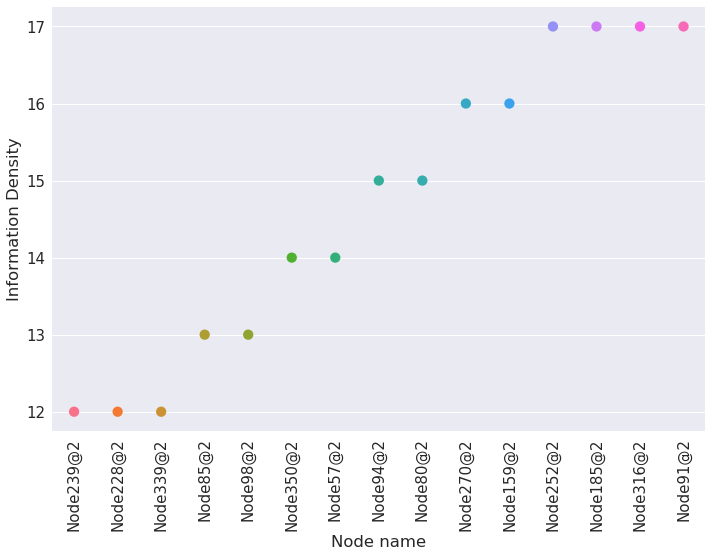

In [122]:
%matplotlib inline

sns.set(font_scale = 1.5)
# Draw a pointplot to show pulse as a function of three categorical factors
sns.set_color_codes("pastel")
#g = sns.barplot(x='Node name',y='Distance',hue='Feature Selection Method', data=b_plot_df)
g = sns.factorplot(x="Node name",y="Information Density", 
                   data=redundancy_df.sort_values(by=['Information Density']),capsize=0.2, palette="husl", 
                   size=7, aspect=1.5, alpha=0.5)
# g = sns.FacetGrid(b_plot_df,hue="Feature Selection Method", size=15, aspect=2)
# g.map(plt.scatter, "Node name", "Distance", alpha=.5)
g.set_xticklabels(rotation=90)

In [119]:
# Creating the df
b_plot_df = pd.DataFrame(columns=["Node name","Distance","Feature Selection Method"])

#print(size_label)
for result in results:
    dataset = result['dataset']
    for e in [x for x in result['results'] if x['node'] in sorted_nodes[15:30] and x['model']=="MMPC"]:
        b_plot_df = b_plot_df.append({
                "Node name":e['node'], 
                "Distance":e['distance'],
                "Feature Selection Method":e['model'],
                "Dataset":dataset,
                "Information Density": getInfoDensity(e['node'],sorted_density),
                  }, ignore_index=True)

Node159@2
Node159@2
Node159@2
Node159@2
Node159@2
Node185@2
Node185@2
Node185@2
Node185@2
Node185@2
Node228@2
Node228@2
Node228@2
Node228@2
Node228@2
Node239@2
Node239@2
Node239@2
Node239@2
Node239@2
Node252@2
Node252@2
Node252@2
Node252@2
Node252@2
Node270@2
Node270@2
Node270@2
Node270@2
Node270@2
Node316@2
Node316@2
Node316@2
Node316@2
Node316@2
Node339@2
Node339@2
Node339@2
Node339@2
Node339@2
Node350@2
Node350@2
Node350@2
Node350@2
Node350@2
Node57@2
Node57@2
Node57@2
Node57@2
Node57@2
Node80@2
Node80@2
Node80@2
Node80@2
Node80@2
Node85@2
Node85@2
Node85@2
Node85@2
Node85@2
Node91@2
Node91@2
Node91@2
Node91@2
Node91@2
Node94@2
Node94@2
Node94@2
Node94@2
Node94@2
Node98@2
Node98@2
Node98@2
Node98@2
Node98@2
Node159@2
Node159@2
Node159@2
Node159@2
Node159@2
Node185@2
Node185@2
Node185@2
Node185@2
Node185@2
Node228@2
Node228@2
Node228@2
Node228@2
Node228@2
Node239@2
Node239@2
Node239@2
Node239@2
Node239@2
Node252@2
Node252@2
Node252@2
Node252@2
Node252@2
Node270@2
Node270@2
Node270@2


Node270@2
Node270@2
Node316@2
Node316@2
Node316@2
Node316@2
Node316@2
Node339@2
Node339@2
Node339@2
Node339@2
Node339@2
Node350@2
Node350@2
Node350@2
Node350@2
Node350@2
Node57@2
Node57@2
Node57@2
Node57@2
Node57@2
Node80@2
Node80@2
Node80@2
Node80@2
Node80@2
Node85@2
Node85@2
Node85@2
Node85@2
Node85@2
Node91@2
Node91@2
Node91@2
Node91@2
Node91@2
Node94@2
Node94@2
Node94@2
Node94@2
Node94@2
Node98@2
Node98@2
Node98@2
Node98@2
Node98@2
Node159@2
Node159@2
Node159@2
Node159@2
Node159@2
Node185@2
Node185@2
Node185@2
Node185@2
Node185@2
Node228@2
Node228@2
Node228@2
Node228@2
Node228@2
Node239@2
Node239@2
Node239@2
Node239@2
Node239@2
Node252@2
Node252@2
Node252@2
Node252@2
Node252@2
Node270@2
Node270@2
Node270@2
Node270@2
Node270@2
Node316@2
Node316@2
Node316@2
Node316@2
Node316@2
Node339@2
Node339@2
Node339@2
Node339@2
Node339@2
Node350@2
Node350@2
Node350@2
Node350@2
Node350@2
Node57@2
Node57@2
Node57@2
Node57@2
Node57@2
Node80@2
Node80@2
Node80@2
Node80@2
Node80@2
Node85@2
Node85@2
No

Node159@2
Node159@2
Node185@2
Node185@2
Node185@2
Node185@2
Node185@2
Node228@2
Node228@2
Node228@2
Node228@2
Node228@2
Node239@2
Node239@2
Node239@2
Node239@2
Node239@2
Node252@2
Node252@2
Node252@2
Node252@2
Node252@2
Node270@2
Node270@2
Node270@2
Node270@2
Node270@2
Node316@2
Node316@2
Node316@2
Node316@2
Node316@2
Node339@2
Node339@2
Node339@2
Node339@2
Node339@2
Node350@2
Node350@2
Node350@2
Node350@2
Node350@2
Node57@2
Node57@2
Node57@2
Node57@2
Node57@2
Node80@2
Node80@2
Node80@2
Node80@2
Node80@2
Node85@2
Node85@2
Node85@2
Node85@2
Node85@2
Node91@2
Node91@2
Node91@2
Node91@2
Node91@2
Node94@2
Node94@2
Node94@2
Node94@2
Node94@2
Node98@2
Node98@2
Node98@2
Node98@2
Node98@2
Node159@2
Node159@2
Node159@2
Node159@2
Node159@2
Node185@2
Node185@2
Node185@2
Node185@2
Node185@2
Node228@2
Node228@2
Node228@2
Node228@2
Node228@2
Node239@2
Node239@2
Node239@2
Node239@2
Node239@2
Node252@2
Node252@2
Node252@2
Node252@2
Node252@2
Node270@2
Node270@2
Node270@2
Node270@2
Node270@2
Node316@2


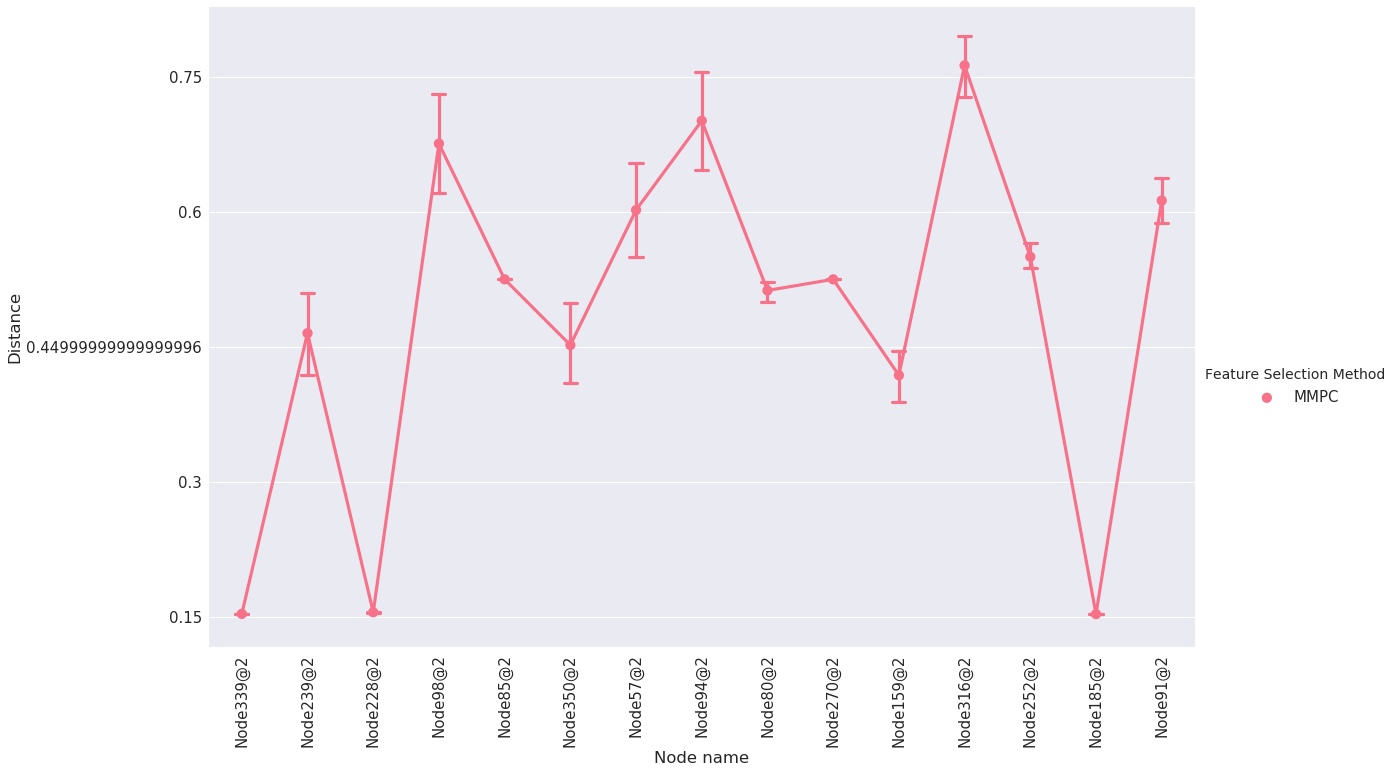

In [120]:
%matplotlib inline

sns.set(font_scale = 1.5)
# Draw a pointplot to show pulse as a function of three categorical factors
sns.set_color_codes("pastel")
#g = sns.barplot(x='Node name',y='Distance',hue='Feature Selection Method', data=b_plot_df)
g = sns.factorplot(x="Node name",y="Distance",hue='Feature Selection Method', 
                   data=b_plot_df.sort_values(by=['Information Density']),capsize=0.2, palette="husl", 
                   size=10, aspect=1.5, alpha=0.5)
# g = sns.FacetGrid(b_plot_df,hue="Feature Selection Method", size=15, aspect=2)
# g.map(plt.scatter, "Node name", "Distance", alpha=.5)
g.set_yticklabels(np.arange(0,2,0.15))
g.set_xticklabels(rotation=90)

In [91]:
sorted_nodes[:30]

['Node48@2',
 'Node233@2',
 'Node307@2',
 'Node344@2',
 'Node313@2',
 'Node17@2',
 'Node54@2',
 'Node202@2',
 'Node276@2',
 'Node196@2',
 'Node320@2',
 'Node357@2',
 'Node135@2',
 'Node122@2',
 'Node205@2',
 'Node239@2',
 'Node228@2',
 'Node339@2',
 'Node85@2',
 'Node98@2',
 'Node350@2',
 'Node57@2',
 'Node94@2',
 'Node80@2',
 'Node270@2',
 'Node159@2',
 'Node252@2',
 'Node185@2',
 'Node316@2',
 'Node91@2']

In [299]:
arbitrary_nodes = ['Node184@2','Node14@2','Node237@2','Node88@2','Node110@2','Node20@2']

In [310]:
data_dict = {}
c_plot_df = pd.DataFrame(columns=['Node name', 'Distance', 'Model'])
for result in results:
    #print(len(result['results']))
    for e in result['results']:
        if e['node']+';'+e['model']+';'+result['dataset'].split('s')[1].split('v')[0] not in data_dict.keys():
            data_dict[e['node']+';'+e['model']+';'+result['dataset'].split('s')[1].split('v')[0]] = []
        data_dict[e['node']+';'+e['model']+';'+result['dataset'].split('s')[1].split('v')[0]].append(e['distance'])
        
for e in data_dict:
    
    if e.split(';')[1] != 'MMPC':
        continue

    if e.split(';')[2] != '5000':
        continue
        
    if e.split(';')[0] not in arbitrary_nodes:
        continue
#     c_plot_df = c_plot_df.append({
#         'Node name':e.split(';')[0],
#         'Model':e.split(';')[1]+'_Average',
#         'Distance':sum(data_dict[e])/len(data_dict[e])
#     }, ignore_index=True)
    mean = sum(data_dict[e])/len(data_dict[e])
    std_dev = (sum(list(map(lambda x:x**2-mean**2,data_dict[e])))/len(data_dict[e]))**(1/2)

    c_plot_df = c_plot_df.append({
        'Node name':e.split(';')[0],
        'Model':e.split(';')[1]+'_MaxDistance',
        'Distance':max(data_dict[e])
    }, ignore_index=True)

    c_plot_df = c_plot_df.append({
        'Node name':e.split(';')[0],
        'Model':e.split(';')[1]+'_StdDev',
        'Distance':std_dev
    }, ignore_index=True)
    
    c_plot_df = c_plot_df.append({
        'Node name':e.split(';')[0],
        'Model':e.split(';')[1]+'_MinDistance',
        'Distance':min(data_dict[e])
    }, ignore_index=True)


        
        
        
        

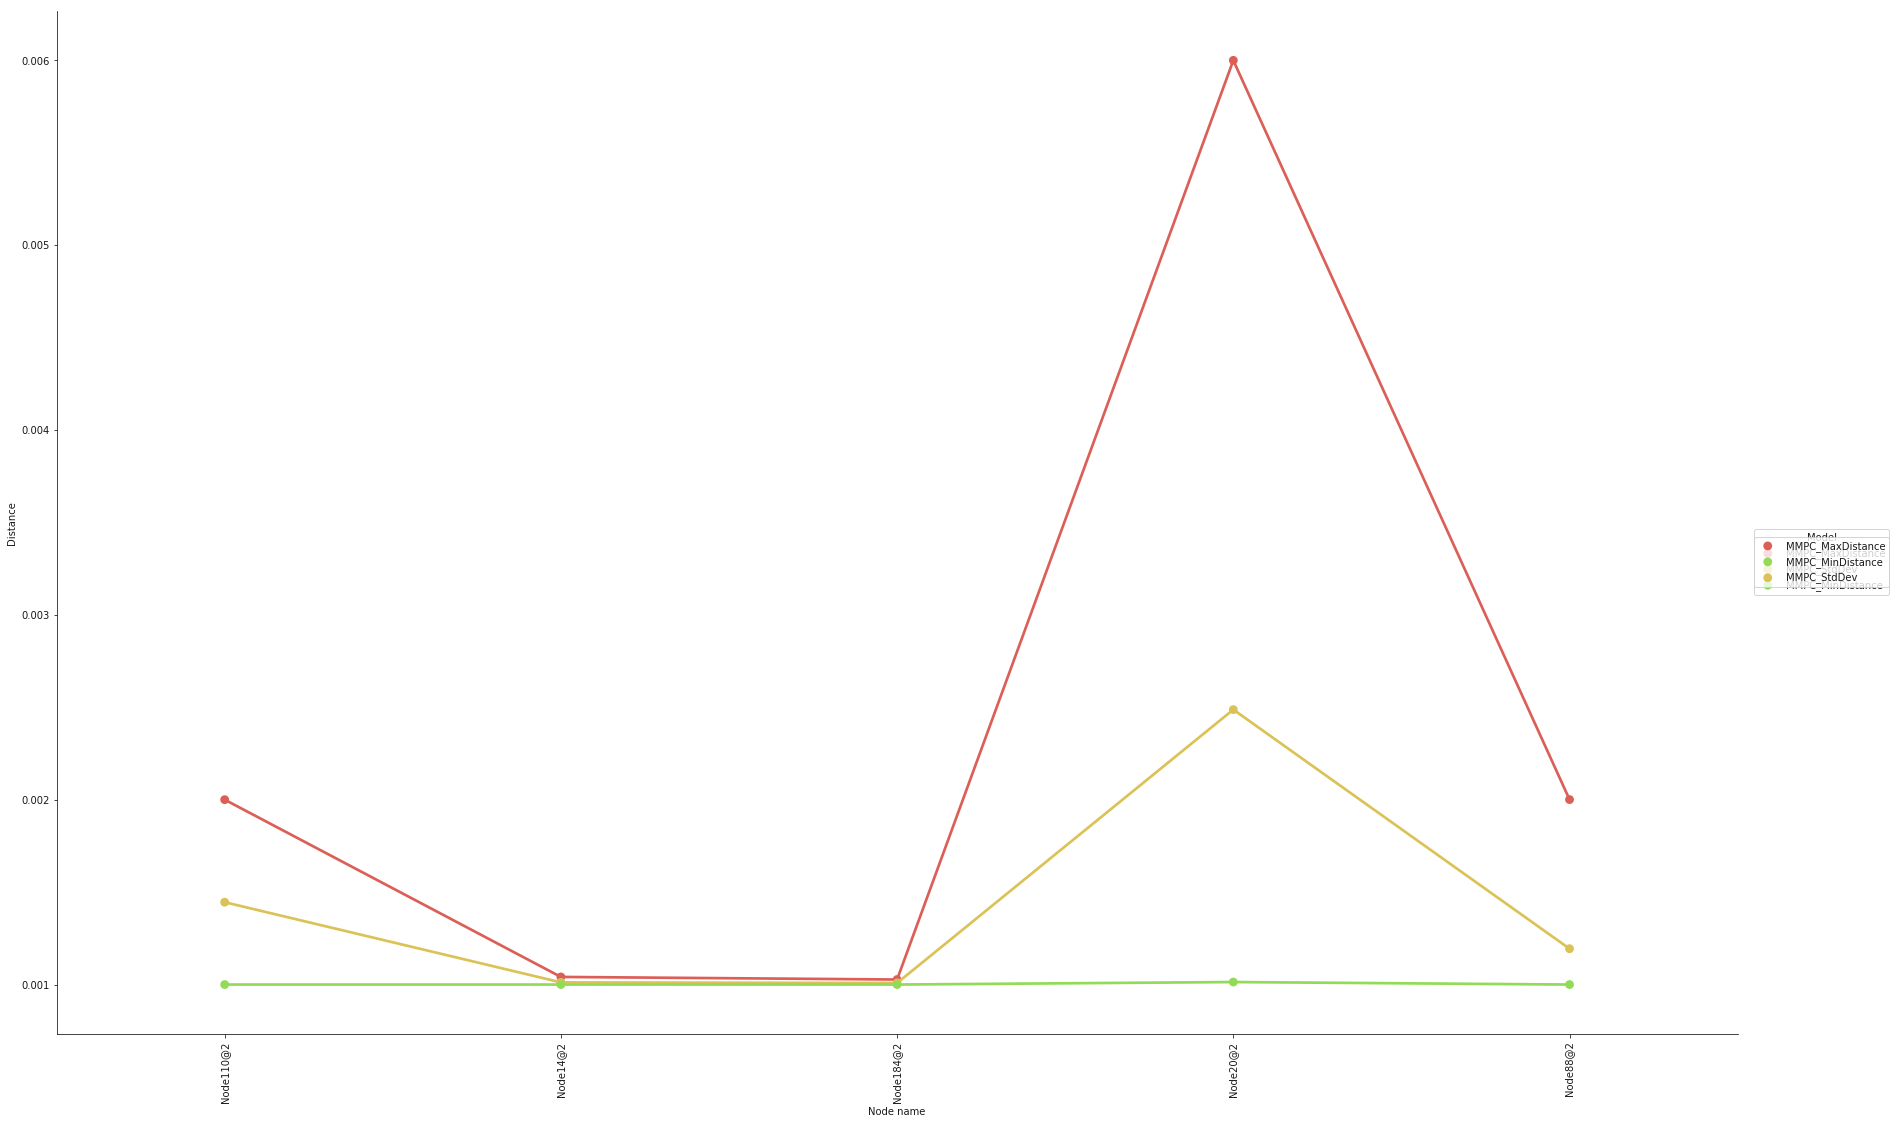

In [311]:
%matplotlib inline


# Draw a pointplot to show pulse as a function of three categorical factors
sns.set_color_codes("pastel")
#g = sns.barplot(x='Node name',y='Distance',hue='Feature Selection Method', data=b_plot_df)
g = sns.factorplot(x="Node name",y="Distance",hue='Model', 
                   data=c_plot_df,capsize=.2, palette=sns.color_palette("hls", 8), 
                   size=15, aspect=1.5, alpha=0.5)
# g = sns.FacetGrid(b_plot_df,hue="Feature Selection Method", size=15, aspect=2)
# g.map(plt.scatter, "Node name", "Distance", alpha=.5)

g.set_yticklabels(np.arange(0,10,0.001))
g.set_xticklabels(rotation=90)
g.add_legend()

In [316]:
time_dict = {}
d_plot_df = pd.DataFrame(columns=['Node name', 'Time', 'Model'])
for result in results:
    for e in result['results']:
        if e['node']+';'+e['model']+';'+result['dataset'].split('s')[1].split('v')[0] not in time_dict.keys():
            time_dict[e['node']+';'+e['model']+';'+result['dataset'].split('s')[1].split('v')[0]] = []
        time_dict[e['node']+';'+e['model']+';'+result['dataset'].split('s')[1].split('v')[0]].append(e['time'])
        
for e in time_dict:
    
#     if e.split(';')[1] != 'MMPCOPT':
#         continue
    if e.split(';')[2] != '5000':
        continue
        
#     if e.split(';')[0] not in arbitrary_nodes:
#         continue
    
#     d_plot_df = d_plot_df.append({
#         'Node name':e.split(';')[0],
#         'Model':e.split(';')[1]+'_Average',
#         'Time':sum(time_dict[e])/len(time_dict[e])
#     }, ignore_index=True)
    
    mean = sum(data_dict[e])/len(data_dict[e])
    std_dev = (sum(list(map(lambda x:x**2-mean**2,data_dict[e])))/len(data_dict[e]))**(1/2)
    #print(std_dev)
    d_plot_df = d_plot_df.append({
        'Node name':e.split(';')[0],
        'Model':e.split(';')[1]+'_StdDev',
        'Time':std_dev
    }, ignore_index=True)
#     d_plot_df = d_plot_df.append({
#         'Node name':e.split(';')[0],
#         'Model':e.split(';')[1]+'_MaxTime',
#         'Time':max(time_dict[e])
#     }, ignore_index=True)
    
#     d_plot_df = d_plot_df.append({
#         'Node name':e.split(';')[0],
#         'Model':e.split(';')[1]+'_MinTime',
#         'Time':min(time_dict[e])
#     }, ignore_index=True)

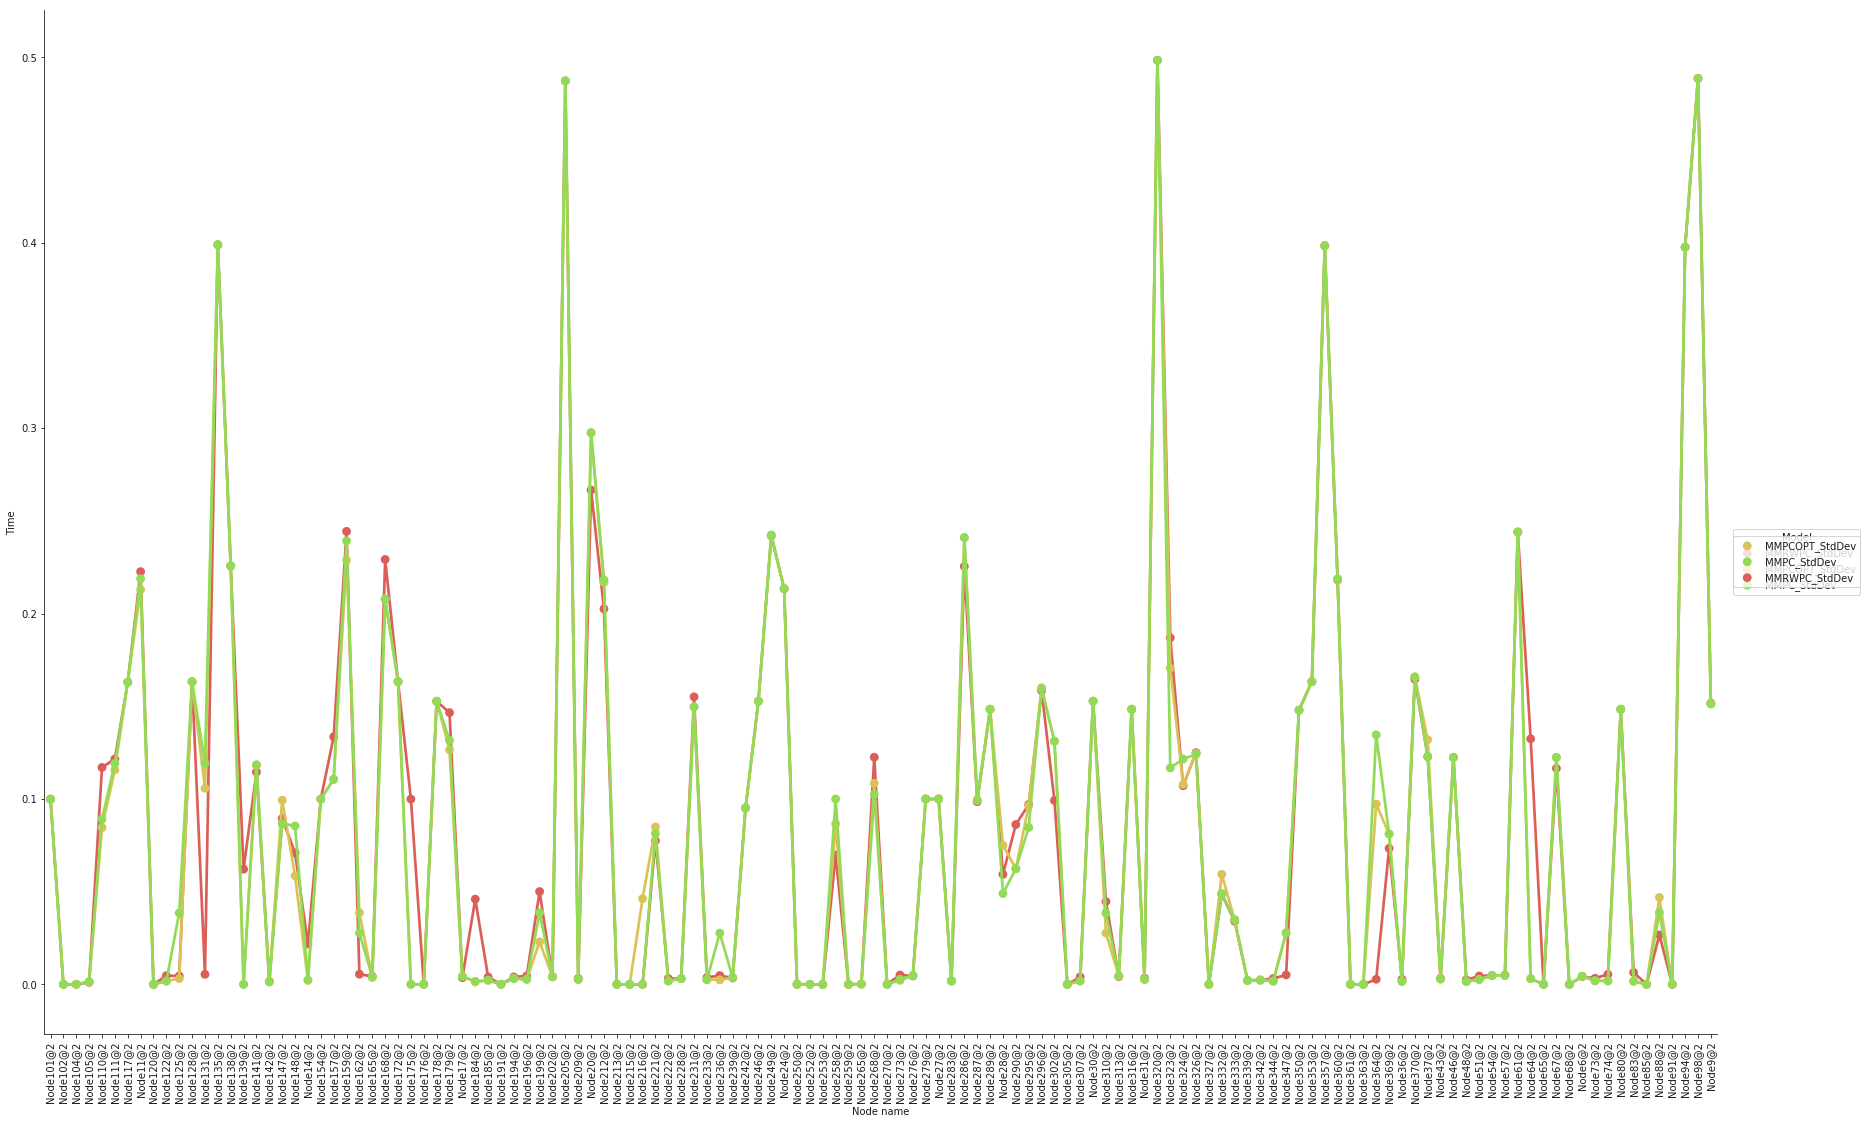

In [317]:
%matplotlib inline


# Draw a pointplot to show pulse as a function of three categorical factors
sns.set_color_codes("pastel")
#g = sns.barplot(x='Node name',y='Distance',hue='Feature Selection Method', data=b_plot_df)
g = sns.factorplot(x="Node name",y="Time",hue='Model', 
                   data=d_plot_df,capsize=.2, palette=sns.color_palette("hls", 8), 
                   size=15, aspect=1.5, alpha=0.5)
# g = sns.FacetGrid(b_plot_df,hue="Feature Selection Method", size=15, aspect=2)
# g.map(plt.scatter, "Node name", "Distance", alpha=.5)
#g.set_yticklabels(np.arange(0,10,0.00001))
g.set_xticklabels(rotation=90)
g.add_legend()